# Starting Point

This notebook is the second part of the Contoso sales analysis. It focuses on exploring global sales from a geographical and demographic perspective.
Soome of the research questions ar as follows:*
* Which continent records the highest total sales?
* Which top three countries have the highest sales figures?
* Which products are sold the most in each continent, especially in the top-performing continents?
* Which continent has the largest customer base?
* How have sales changed over time across continents?
* Are there seasonal patterns in sales in different regions?
* Which continents contribute the most to total profit margin?
* Do certain product categories dominate in specific regions?
* Which product subcategories show the highest growth in different continents?

In [ ]:
# Load data
from google.colab import files
upl = files.upload()

Saving Dataset 3.csv to Dataset 3.csv


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data
# df = pd.read_csv('CSV 1.csv', encoding='ISO-8859-1')
df = pd.read_csv('Dataset 3.csv',encoding='ISO-8859-1')
# preview data
df.head(5)

,CustomerKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,ProductKey,Sale_month_year,SalesQuantity,SalesAmount,...,ProductSubcategoryKey,BrandName,ClassName,ColorName,Weight,StockTypeName,ProductSubcategoryName,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,333,City,Europe,Berlin,Berlin,Germany,782,Jan-07,1,10.36,...,22,Contoso,Economy,White,16,High,Computers Accessories,NaN,NaN,NaN
1,334,City,Europe,Newcastle upon Tyne,England,United Kingdom,782,Jan-07,1,10.36,...,22,Contoso,Economy,White,16,High,Computers Accessories,NaN,NaN,NaN
2,335,City,Europe,Stoke-on-Trent,England,United Kingdom,782,Jan-07,1,10.36,...,22,Contoso,Economy,White,16,High,Computers Accessories,NaN,NaN,NaN
3,336,City,Europe,Hof,Bavaria,Germany,782,Jan-07,1,10.36,...,22,Contoso,Economy,White,16,High,Computers Accessories,NaN,NaN,NaN
4,337,City,Europe,Paris,Seine (Paris),France,782,Jan-07,1,10.36,...,22,Contoso,Economy,White,16,High,Computers Accessories,NaN,NaN,NaN


In [ ]:
#shape of data
df.shape

(1000000, 28)

<Axes: >

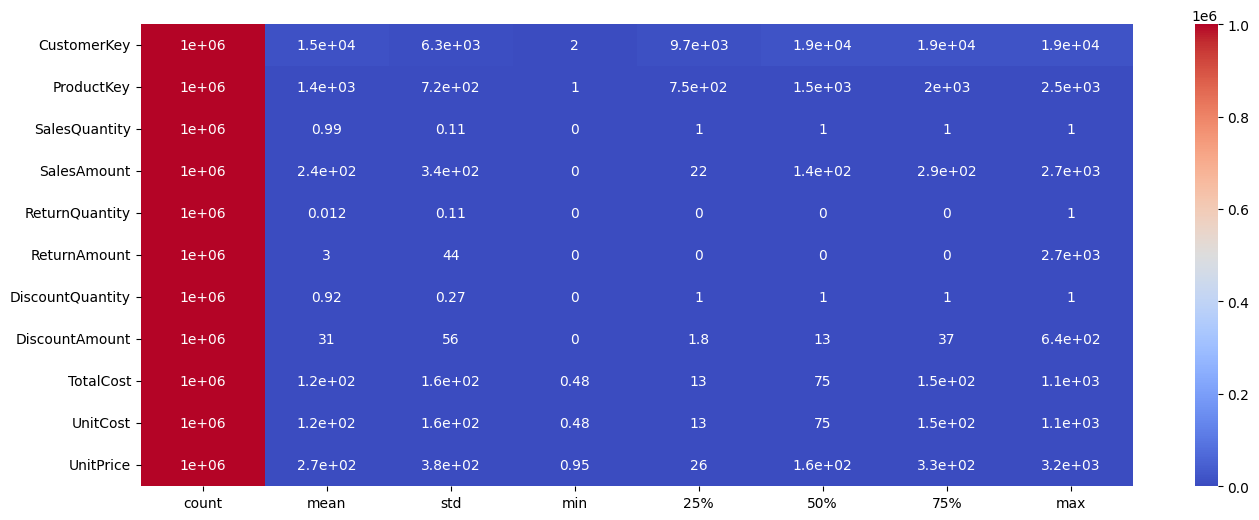

In [ ]:
# data secription heatmap
desc = df.describe().T
# plot heatmap
plt.figure(figsize=(16,6))
sns.heatmap(desc, annot=True, cmap='coolwarm')

In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   CustomerKey             1000000 non-null  int64  
 1   GeographyType           1000000 non-null  object 
 2   ContinentName           1000000 non-null  object 
 3   CityName                1000000 non-null  object 
 4   StateProvinceName       1000000 non-null  object 
 5   RegionCountryName       1000000 non-null  object 
 6   ProductKey              1000000 non-null  int64  
 7   Sale_month_year         1000000 non-null  object 
 8   SalesQuantity           1000000 non-null  int64  
 9   SalesAmount             1000000 non-null  float64
 10  ReturnQuantity          1000000 non-null  int64  
 11  ReturnAmount            1000000 non-null  float64
 12  DiscountQuantity        1000000 non-null  int64  
 13  DiscountAmount          1000000 non-null  float64
 14  Tot

In [ ]:
#check for missing values
df.isnull().sum()

,0
CustomerKey,0
GeographyType,0
ContinentName,0
CityName,0
StateProvinceName,0
RegionCountryName,0
ProductKey,0
Sale_month_year,0
SalesQuantity,0
SalesAmount,0


In [ ]:
# dropping unneeded column
cols = ['Weight','Unnamed: 25','Unnamed: 26','Unnamed: 27']
df.drop(cols, axis=1, inplace=True)
# drop na rows
df.dropna(inplace=True)
# check for any remaining missing values
df.isnull().sum()

,0
CustomerKey,0
GeographyType,0
ContinentName,0
CityName,0
StateProvinceName,0
RegionCountryName,0
ProductKey,0
Sale_month_year,0
SalesQuantity,0
SalesAmount,0


In [ ]:
# check for dupllicates
#check for duplicated data
print('The amount of duplicated data present:',df.duplicated().sum())

The amount of duplicated data present: 576121


In [ ]:
df = df.drop_duplicates()
# new line to separate result
print('-----------------------------------------------------')
print('Final amount of duplicated values remaining:', df.duplicated().sum())

-----------------------------------------------------
Final amount of duplicated values remaining: 0


In [ ]:
df.shape

(423568, 24)

<Axes: >

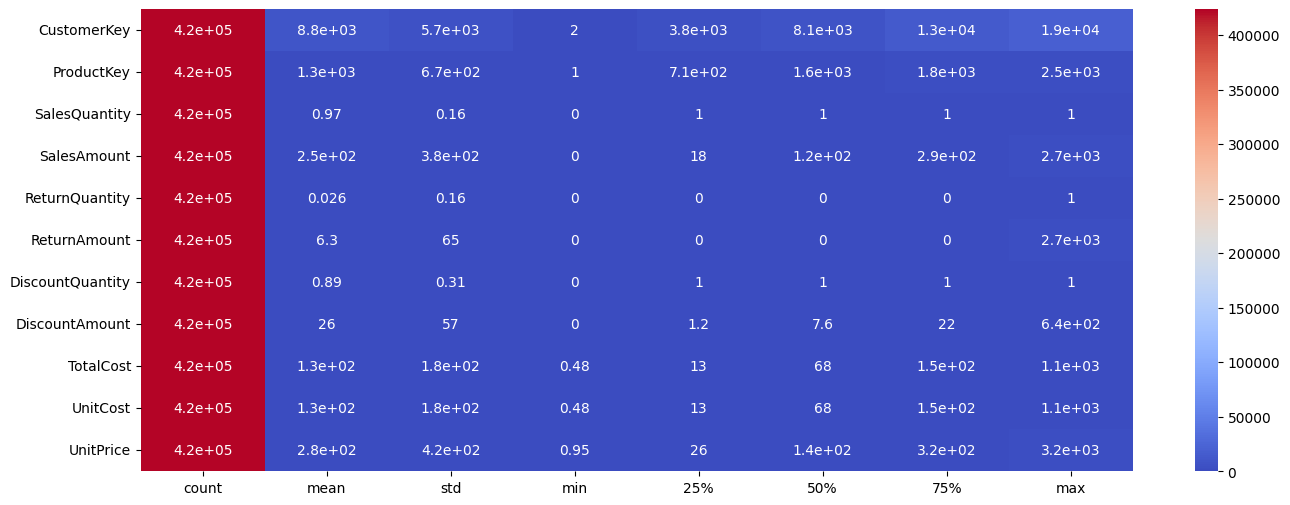

In [ ]:
# data secription heatmap
desc2 = df.describe().T
# plot heatmap
plt.figure(figsize=(16,6))
sns.heatmap(desc2, annot=True, cmap='coolwarm')

# Visualizations

In [ ]:
# cols to plot
df.columns

Index(['CustomerKey', 'GeographyType', 'ContinentName', 'CityName',
       'StateProvinceName', 'RegionCountryName', 'ProductKey',
       'Sale_month_year', 'SalesQuantity', 'SalesAmount', 'ReturnQuantity',
       'ReturnAmount', 'DiscountQuantity', 'DiscountAmount', 'TotalCost',
       'UnitCost', 'UnitPrice', 'ProductName', 'ProductSubcategoryKey',
       'BrandName', 'ClassName', 'ColorName', 'StockTypeName',
       'ProductSubcategoryName'],
      dtype='object')

<Axes: xlabel='RegionCountryName', ylabel='count'>

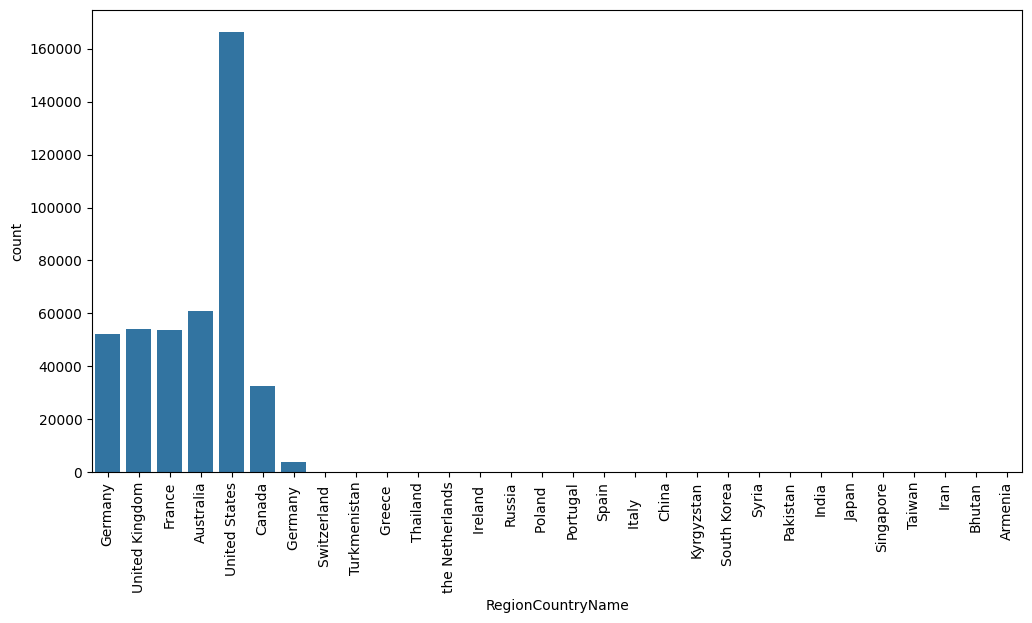

In [ ]:
# country distribution
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(x='RegionCountryName', data=df)

### Sales across cities

In [ ]:
# city values counts
df['CityName'].value_counts()

,count
CityName,
London,11645
Paris,11251
Berlin,10539
Beverly Hills,4457
Burien,4434
...,...
Syracuse,2
Tallahassee,2
Tampa,2


In [ ]:
# city sales
city_sales =df.groupby("CityName")["SalesAmount"].sum().reset_index()
# top 10 cities
top_cities = city_sales.sort_values(by="SalesAmount", ascending=False).head(10)
# Convert to Millions
top_cities["Sales_in_Millions"] = top_cities["SalesAmount"] / 1_000_000

# Format neatly with 2 decimals + "M"
top_cities["Sales_in_Millions"] = top_cities["Sales_in_Millions"].apply(lambda x: f"{x:,.2f} M")
top_cities

,CityName,SalesAmount,Sales_in_Millions
247,London,2.787720e+06,2.79 M
335,Paris,2.411545e+06,2.41 M
33,Berlin,2.258547e+06,2.26 M
23,Beaverton,1.254722e+06,1.25 M
105,Chula Vista,1.218138e+06,1.22 M
64,Burien,1.203914e+06,1.20 M
28,Bellingham,1.202591e+06,1.20 M
123,Concord,1.177259e+06,1.18 M
37,Beverly Hills,1.160781e+06,1.16 M
30,Berkeley,1.111055e+06,1.11 M


Top 10 cities that genereated the most revenue. with London and Paris being the cities with the most revenue genereated. Perhapss indicating the Europe provides the most sales.

### Sales across continents

<Axes: xlabel='ContinentName', ylabel='count'>

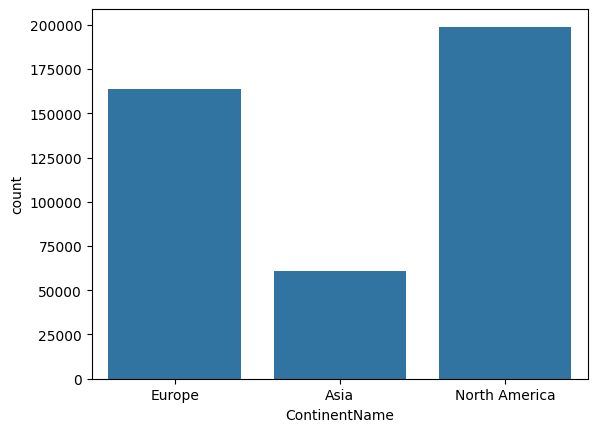

In [ ]:
# Continental sales distirbutuin
sns.countplot(x='ContinentName', data=df)

In [ ]:
# continental sales
continent_sales = df.groupby('ContinentName')['SalesAmount'].sum().reset_index()
# get sales in millions
continent_sales['sales_in_millions'] = continent_sales['SalesAmount'] / 1_000_000
# show sales results with Million Notation (M)
continent_sales['sales_in_millions'] = continent_sales['sales_in_millions'].apply(lambda x: f"{x:,.2f} M")
# display results
continent_sales

,ContinentName,SalesAmount,sales_in_millions
0,Asia,1.345665e+07,13.46 M
1,Europe,3.633317e+07,36.33 M
2,North America,5.505872e+07,55.06 M


Despite having the top 3 cities providing the most revenue overall, Europe is not the continent that has the most sales (count of transactions). North America is the continent with the most sales.

???? Then what makes Europes cities make most revenue???

### Products, Cities and Sales

In [ ]:
# cont of products in dataset
print('The distinct amount of products sold is :',len(df['ProductName'].unique()))

The distinct amount of products sold is : 2222


In [ ]:
# products and sales
product_sales = df.groupby('ProductName')['SalesAmount'].sum().reset_index()
# TOP 15 products
top_15_prod = product_sales.sort_values(by='SalesAmount',ascending=False).head(15)
#sales in millions
top_15_prod['sales_in_millions'] = top_15_prod['SalesAmount']/1_000_000
# add million (M) notation
top_15_prod['sales_in_millions'] = top_15_prod['sales_in_millions'].apply(lambda x:f'{x:,.2f}M')
# display results
top_15_prod

,ProductName,SalesAmount,sales_in_millions
1548,NT Washer & Dryer 27in L2700 Silver,1775612.499,1.78M
1549,NT Washer & Dryer 27in L2700 White,1720644.411,1.72M
1547,NT Washer & Dryer 27in L2700 Green,1665729.381,1.67M
1546,NT Washer & Dryer 27in L2700 Blue,1457503.260,1.46M
1390,Litware Washer & Dryer 21in E214 Green,1126031.790,1.13M
1536,NT Washer & Dryer 21in E2100 Silver,986402.346,0.99M
1389,Litware Washer & Dryer 21in E214 Blue,960935.040,0.96M
1534,NT Washer & Dryer 21in E2100 Blue,946932.813,0.95M
853,Contoso Washer & Dryer 21in E210 White,929626.620,0.93M
855,Contoso Washer & Dryer 24in M240 Green,928143.540,0.93M


In [ ]:
# products sales and respective cities
# london city
london_df = df[df["CityName"] == "London"]
# group data
london_prod_sales = london_df.groupby('ProductName')['SalesAmount'].sum().reset_index()
# TOP 15 products
top_15_prod = london_prod_sales.sort_values(by='SalesAmount',ascending=False).head(15)
#sales in millions
top_15_prod['sales_in_millions'] = top_15_prod['SalesAmount']/1_000_000
# add million (M) notation
top_15_prod['sales_in_millions'] = top_15_prod['sales_in_millions'].apply(lambda x:f'{x:,.2f}M')
# display results
top_15_prod

,ProductName,SalesAmount,sales_in_millions
936,NT Washer & Dryer 27in L2700 Green,123810.843,0.12M
935,NT Washer & Dryer 27in L2700 Blue,121635.465,0.12M
937,NT Washer & Dryer 27in L2700 Silver,100624.497,0.10M
938,NT Washer & Dryer 27in L2700 White,78313.608,0.08M
796,Litware Washer & Dryer 21in E214 Blue,47826.090,0.05M
441,Contoso Projector 1080p X980 White,34884.000,0.03M
1037,Proseware Projector 1080p LCD86 Black,33346.350,0.03M
798,Litware Washer & Dryer 21in E214 Silver,30812.730,0.03M
521,Contoso Washer & Dryer 24in M240 Blue,30433.320,0.03M
803,Litware Washer & Dryer 24in M260 White,28742.580,0.03M


Given that there s a lot of data to look at a basc function can be used to get the data faster.

In [ ]:
# Resuable function
def city_sales_product_function (city_df, data_1, data_2,TopN):  # lol couldnt think of a name
  city_prod_sales = city_df.groupby(data_1)[data_2].sum().reset_index() # group data
  top_values = city_prod_sales.sort_values(by=data_2, ascending=False).head(TopN)
  top_values['sales_in_millions'] = top_values['SalesAmount']/1_000_000
  top_values['sales_in_millions'] = top_values['sales_in_millions'].apply(lambda x:f'{x:,.2f}M')
  return top_values


#### Europe continent

In [ ]:
# paris city
paris_df = df[df["CityName"] == "Paris"]
# function call
city_sales_product_function(paris_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
530,Contoso Washer & Dryer 24in M240 Green,49031.460,0.05M
811,Litware Washer & Dryer 21in E214 Blue,47618.220,0.05M
947,NT Washer & Dryer 21in E2100 White,42765.327,0.04M
813,Litware Washer & Dryer 21in E214 Silver,41877.810,0.04M
951,NT Washer & Dryer 24in M2400 White,40597.848,0.04M


In [ ]:
# berlin city
berlin_df = df[df["CityName"] == "Berlin"]
# function call
city_sales_product_function(berlin_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
647,Contoso Washer & Dryer 24in M240 Red,23670.360,0.02M
1134,NT Washer & Dryer 21in E2100 Silver,20622.711,0.02M
1008,Litware Washer & Dryer 24in M260 White,20288.880,0.02M
645,Contoso Washer & Dryer 24in M240 Green,20288.880,0.02M
1003,Litware Washer & Dryer 21in E214 Silver,20195.370,0.02M


In [ ]:
# Beaverton city
Beaverton_df = df[df["CityName"] == "Beaverton"]
# function call
city_sales_product_function(Beaverton_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
793,NT Washer & Dryer 21in E2100 Green,18158.865,0.02M
681,Litware Washer & Dryer 21in E214 Green,17029.350,0.02M
680,Litware Washer & Dryer 21in E214 Blue,14311.050,0.01M
797,NT Washer & Dryer 24in M2400 Green,13914.585,0.01M
124,Adventure Works Desktop PC1.80 ED182 Brown,13322.335,0.01M


#### North America

In [ ]:
# first lets get the top 3 north amaerican cities with the most revenue generated
North_America_df = df[df['ContinentName']=='North America']
# group by product name and sales amount
North_America_sales = North_America_df.groupby('CityName')['SalesAmount'].sum().reset_index()
# get top 5 cities
top_5_North_America_sales = North_America_sales.sort_values(by='SalesAmount',ascending=False).head(5)
top_5_North_America_sales

,CityName,SalesAmount
18,Beaverton,1.254722e+06
74,Chula Vista,1.218138e+06
43,Burien,1.203914e+06
22,Bellingham,1.202591e+06
88,Concord,1.177259e+06


In [ ]:
# Beaverton city
Beaverton_df = df[df["CityName"] == "Beaverton"]
# function call
city_sales_product_function(Beaverton_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
793,NT Washer & Dryer 21in E2100 Green,18158.865,0.02M
681,Litware Washer & Dryer 21in E214 Green,17029.350,0.02M
680,Litware Washer & Dryer 21in E214 Blue,14311.050,0.01M
797,NT Washer & Dryer 24in M2400 Green,13914.585,0.01M
124,Adventure Works Desktop PC1.80 ED182 Brown,13322.335,0.01M


In [ ]:
# Chula Vista city
Chula_Vista_df = df[df["CityName"] == "Chula Vista"]
# function call
city_sales_product_function(Chula_Vista_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
842,NT Washer & Dryer 27in L2700 White,46160.460,0.05M
840,NT Washer & Dryer 27in L2700 Green,42313.755,0.04M
841,NT Washer & Dryer 27in L2700 Silver,27059.580,0.03M
927,Proseware Projector 1080p LCD86 Black,21802.500,0.02M
448,Contoso Washer & Dryer 24in M240 Green,17271.000,0.02M


In [ ]:
# Burien city
Burien_df = df[df["CityName"] == "Burien"]
# function call
city_sales_product_function(Burien_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
432,Contoso Washer & Dryer 21in E210 Blue,18148.65,0.02M
833,NT Washer & Dryer 24in M2400 Green,15096.87,0.02M
830,NT Washer & Dryer 21in E2100 Silver,12159.24,0.01M
439,Contoso Washer & Dryer 24in M240 Green,10635.30,0.01M
712,Litware Washer & Dryer 21in E214 Blue,10153.65,0.01M


#### Asia

In [ ]:
# first lets get the top 3 north amaerican cities with the most revenue generated
Asia_df = df[df['ContinentName']=='Asia']
# group by product name and sales amount
Asia_sales = Asia_df.groupby('CityName')['SalesAmount'].sum().reset_index()
# get top 5 cities
top_5_Asia_sales_sales = Asia_sales.sort_values(by='SalesAmount',ascending=False).head(5)
top_5_Asia_sales_sales

,CityName,SalesAmount
11,Cranbourne,761391.3495
10,Coffs Harbour,721676.1078
3,Bendigo,617916.8835
31,Melbourne,589077.3857
13,Darlinghurst,528768.6584


Huh? that doesnt seem right, most of this cities belong to australia. Lets check all unique cities in asia and see if they are actually from asia

##### City - Contienent Validation

In [ ]:
Asia_df.CityName.unique()

array(['Wollongong', 'East Brisbane', 'Matraville', 'Warrnambool',
       'Bendigo', 'Hervey Bay', 'Cloverdale', 'Melton', 'Cranbourne',
       'Port Macquarie', 'North Sydney', 'Rhodes', 'Perth',
       'Lavender Bay', 'Caloundra', 'Coffs Harbour', 'Malabar', 'Sydney',
       'Darlinghurst', 'Gold Coast', 'St. Leonards', 'South Melbourne',
       'Geelong', 'Hobart', 'Milsons Point', 'Sunbury', 'Hawthorne',
       'Goulburn', 'Newcastle', 'Lane Cove', 'Findon', 'Townsville',
       'Silverwater', 'Melbourne', 'Rockhampton', 'Seaford', 'Springwood',
       'North Ryde', 'Brisbane', 'Ashgabat', 'Bangkok', 'Beijing',
       'Bishkek', 'Busan ', 'Canberra', 'Damascus', 'Guangzhou',
       'Hong Kong', 'Islamabad', 'Kolkata ', 'Kyoto ', 'Miyagi',
       'Mumbai ', 'Nagoya ', 'New Delhi', 'Osaka ', 'Sapporo ', 'Seoul',
       'Shanghai', 'Singapore', 'Taipei', 'Tehran', 'Thimphu', 'Tokyo',
       'Urumqi', 'Yerevan', 'Yokohama '], dtype=object)

In [ ]:
North_America_df.CityName.unique()

array(['Coronado', 'Daly City', 'Lakewood', 'San Francisco', 'Burbank',
       'Imperial Beach', 'Tacoma', 'Lebanon', 'Haney', 'Berkeley',
       'Chula Vista', 'Fremont', 'Torrance', 'Downey', 'Lynnwood',
       'Seattle', 'Oakland', 'Shawnee', 'Langford', 'Bellflower',
       'Port Orchard', 'Beaverton', 'Issaquah', 'Corvallis', 'Burien',
       'Lemon Grove', 'San Gabriel', 'Glendale', 'Ballard', 'Puyallup',
       'Renton', 'Woodburn', 'Colma', 'Beverly Hills', 'Long Beach',
       'Los Angeles', 'Redwood City', 'Royal Oak', 'Oregon City',
       'El Cajon', 'Oak Bay', 'Lincoln Acres', 'National City', 'Sooke',
       'Olympia', 'Portland', 'Kirkland', 'Marysville', 'Concord',
       'La Jolla', 'N. Vancouver', 'Bellingham', 'San Diego', 'Spokane',
       'Newton', 'Milwaukie', 'Bremerton', 'Langley', 'San Carlos',
       'Burlingame', 'Salem', 'Spring Valley', 'Victoria',
       'Sedro Woolley', 'Yakima', 'Redmond', 'Vancouver', 'Santa Monica',
       'Newport Beach', 'Lake Oswego

In [ ]:
Europe_df = df[df['ContinentName']=='Europe']
Europe_df.CityName.unique()

array(['Berlin', 'Newcastle upon Tyne', 'Stoke-on-Trent', 'Hof', 'Paris',
       'Watford', 'Bonn', 'Cheltenham', 'Boulogne-sur-Mer', 'Oxon',
       'Oxford', 'Tremblay-en-France', 'Brunswick', 'Paderborn', 'Munich',
       'Peterborough', 'London', 'Solingen', 'Birmingham', 'Versailles',
       'Esher-Molesey', 'Runcorn', 'Hamburg ', 'Les Ulis', 'Wokingham',
       'Liverpool', 'Gateshead', 'York', 'Orleans', 'Pantin',
       'Warrington', 'Grevenbroich', 'Salzgitter', 'Werne',
       'High Wycombe', 'Metz', 'Boulogne-Billancourt', 'Saarlouis',
       'Roubaix', 'Roissy en Brie', 'Darmstadt', 'Dusseldorf',
       'Saint Germain en Laye', 'Frankfurt', 'Saint Ouen',
       'Milton Keynes', 'Kassel', 'Munster', 'Stuttgart', 'Chatou',
       'Drancy', 'Sèvres', 'Erlangen', 'Dunkerque', 'Paris La Defense',
       'Eilenburg', 'Colombes', 'Reading', 'Ingolstadt', 'Kirkby',
       'Croix', 'Bottrop', 'Kiel', "Villeneuve-d'Ascq", 'Lille',
       'Neunkirchen', 'Lancaster', 'Saint-Denis', 'Sul

seems Europe and North america cities are correctly placed in the continents but asia has been mixed with australian cities. Lets rectify that.

In [ ]:
# data split
australian_cities = ["Wollongong","East Brisbane","Matraville","Warrnambool","Bendigo","Hervey Bay",
                     "Cloverdale","Melton","Cranbourne","Port Macquarie","North Sydney","Rhodes","Perth"
                     ,"Lavender Bay","Caloundra","Coffs Harbour","Malabar","Sydney","Darlinghurst","Gold Coast",
                     "St. Leonards","South Melbourne","Geelong","Hobart","Milsons Point","Sunbury","Hawthorne","Goulburn",
                     "Newcastle","Lane Cove","Findon","Townsville","Silverwater","Melbourne","Rockhampton","Seaford","Springwood",
                     "North Ryde","Brisbane","Canberra"]
len(australian_cities)

# get australia-specific data
aus_df = df[df["CityName"].isin(australian_cities)]
# replace continent name Asia with Australia
aus_df['ContinentName'] = 'Australia'
aus_df.head(4)

/tmp/ipython-input-990818551.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_df['ContinentName'] = 'Australia'


,CustomerKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,ProductKey,Sale_month_year,SalesQuantity,SalesAmount,...,TotalCost,UnitCost,UnitPrice,ProductName,ProductSubcategoryKey,BrandName,ClassName,ColorName,StockTypeName,ProductSubcategoryName
16,5,City,Australia,Wollongong,New South Wales,Australia,268,Jan-07,1,755.65,...,294.54,294.54,889.0,Contoso Home Theater System 7.1 Channel M1700 ...,11,Contoso,Regular,White,High,Home Theater System
17,6,City,Australia,East Brisbane,Queensland,Australia,268,Jan-07,1,755.65,...,294.54,294.54,889.0,Contoso Home Theater System 7.1 Channel M1700 ...,11,Contoso,Regular,White,High,Home Theater System
18,7,City,Australia,Matraville,New South Wales,Australia,268,Jan-07,1,755.65,...,294.54,294.54,889.0,Contoso Home Theater System 7.1 Channel M1700 ...,11,Contoso,Regular,White,High,Home Theater System
19,8,City,Australia,Warrnambool,Victoria,Australia,268,Jan-07,1,755.65,...,294.54,294.54,889.0,Contoso Home Theater System 7.1 Channel M1700 ...,11,Contoso,Regular,White,High,Home Theater System


In [ ]:
# drop australian data from the main dataset
df = df[~df["CityName"].isin(australian_cities)]
# merge the main with the rectified australian data through concatanation
df = pd.concat([df, aus_df], ignore_index=True)
# preview df
df.head(4)

,CustomerKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,ProductKey,Sale_month_year,SalesQuantity,SalesAmount,...,TotalCost,UnitCost,UnitPrice,ProductName,ProductSubcategoryKey,BrandName,ClassName,ColorName,StockTypeName,ProductSubcategoryName
0,333,City,Europe,Berlin,Berlin,Germany,782,Jan-07,1,10.36,...,6.6,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories
1,334,City,Europe,Newcastle upon Tyne,England,United Kingdom,782,Jan-07,1,10.36,...,6.6,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories
2,335,City,Europe,Stoke-on-Trent,England,United Kingdom,782,Jan-07,1,10.36,...,6.6,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories
3,336,City,Europe,Hof,Bavaria,Germany,782,Jan-07,1,10.36,...,6.6,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories


<Axes: xlabel='ContinentName', ylabel='count'>

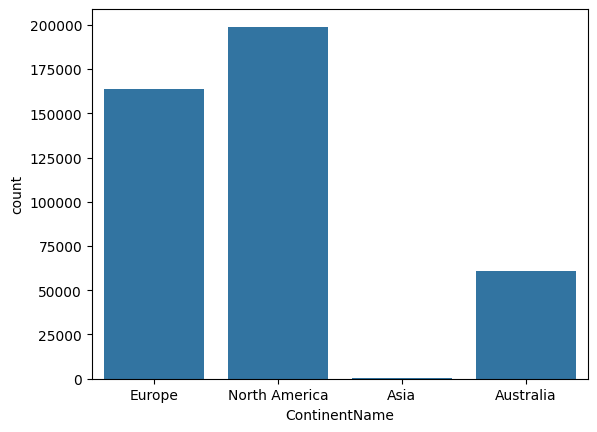

In [ ]:
# visualization check - Continental sales distirbutuin
sns.countplot(x='ContinentName', data=df)

In [ ]:
# continental sales
continent_sales = df.groupby('ContinentName')['SalesAmount'].sum().reset_index()
# get sales in millions
continent_sales['sales_in_millions'] = continent_sales['SalesAmount'] / 1_000_000
# show sales results with Million Notation (M)
continent_sales['sales_in_millions'] = continent_sales['sales_in_millions'].apply(lambda x: f"{x:,.2f} M")
# display results
continent_sales

,ContinentName,SalesAmount,sales_in_millions
0,Asia,2.948025e+04,0.03 M
1,Australia,1.342717e+07,13.43 M
2,Europe,3.633317e+07,36.33 M
3,North America,5.505872e+07,55.06 M


##### Revisiting Asia

In [ ]:
# first lets get the top 3 north amaerican cities with the most revenue generated
Asia_df_2 = df[df['ContinentName']=='Asia']
# group by product name and sales amount
Asia_sales = Asia_df_2.groupby('CityName')['SalesAmount'].sum().reset_index()
# get top 5 cities
top_5_Asia_sales_sales = Asia_sales.sort_values(by='SalesAmount',ascending=False).head(5)
top_5_Asia_sales_sales

,CityName,SalesAmount
0,Ashgabat,7390.1180
1,Bangkok,4241.0635
2,Beijing,733.1135
3,Bishkek,733.1135
4,Busan,733.1135


#### Australian Cities



In [ ]:
Australia_df = df[df['ContinentName']=='Australia']
# group by product name and sales amount
Australia_sales = Australia_df.groupby('CityName')['SalesAmount'].sum().reset_index()
# get top 5 cities
top_5_aus_sales = Australia_sales.sort_values(by='SalesAmount',ascending=False).head(5)
top_5_aus_sales

,CityName,SalesAmount
6,Cranbourne,761391.3495
5,Coffs Harbour,721676.1078
0,Bendigo,617916.8835
20,Melbourne,589077.3857
7,Darlinghurst,528768.6584


In [ ]:
# Cranbourne city
Cranbourne_df = df[df["CityName"] == "Cranbourne"]
# function call
city_sales_product_function(Cranbourne_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
1070,NT Washer & Dryer 27in L2700 Blue,15386.820,0.02M
1062,NT Washer & Dryer 21in E2100 Blue,14159.115,0.01M
614,Contoso Washer & Dryer 21in E210 Pink,13111.800,0.01M
1063,NT Washer & Dryer 21in E2100 Green,11919.255,0.01M
1071,NT Washer & Dryer 27in L2700 Green,10744.245,0.01M


In [ ]:
# Coffs Harbour city
CoffsHarbour_df = df[df["CityName"] == "Coffs Harbour"]
# function call
city_sales_product_function(CoffsHarbour_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
579,Contoso Washer & Dryer 21in E210 Silver,14311.05,0.01M
1007,NT Washer & Dryer 24in M2400 White,11640.96,0.01M
1002,NT Washer & Dryer 21in E2100 Silver,10719.33,0.01M
580,Contoso Washer & Dryer 21in E210 White,10393.50,0.01M
577,Contoso Washer & Dryer 21in E210 Pink,10313.55,0.01M


In [ ]:
# Bendigo city
Bendigo_df = df[df["CityName"] == "Bendigo"]
# function call
city_sales_product_function(Bendigo_df,'ProductName','SalesAmount',5)

,ProductName,SalesAmount,sales_in_millions
541,Contoso Washer & Dryer 21in E210 Silver,14391.00,0.01M
542,Contoso Washer & Dryer 21in E210 White,12951.90,0.01M
925,NT Washer & Dryer 24in M2400 Green,11640.96,0.01M
929,NT Washer & Dryer 27in L2700 Silver,10876.89,0.01M
928,NT Washer & Dryer 27in L2700 Green,10611.60,0.01M


#### Other Visuals

<Axes: xlabel='RegionCountryName', ylabel='count'>

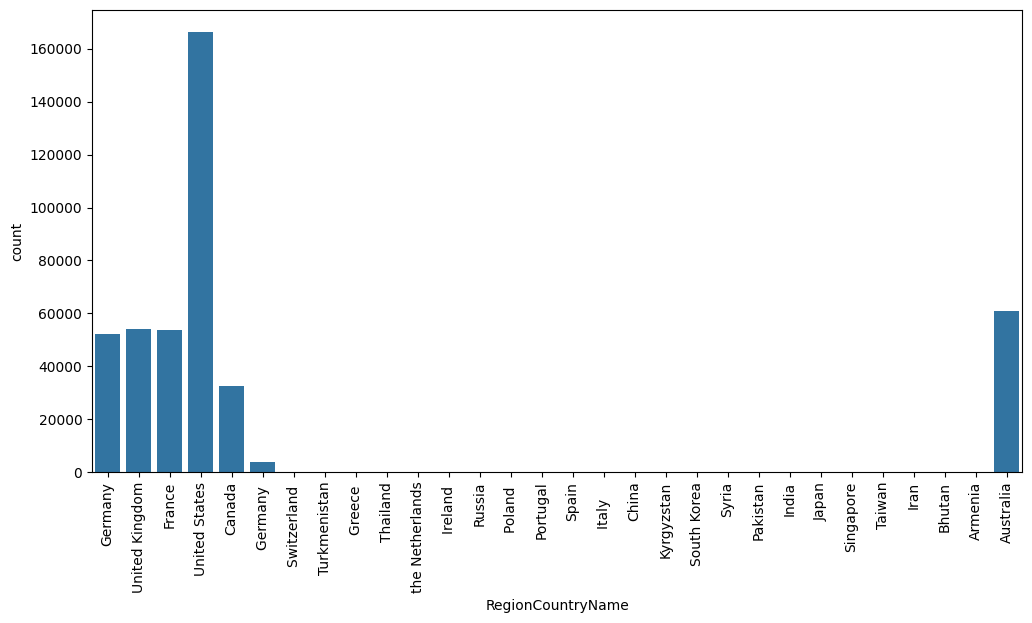

In [ ]:
# region data
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data = df, x='RegionCountryName')

<Axes: xlabel='BrandName', ylabel='count'>

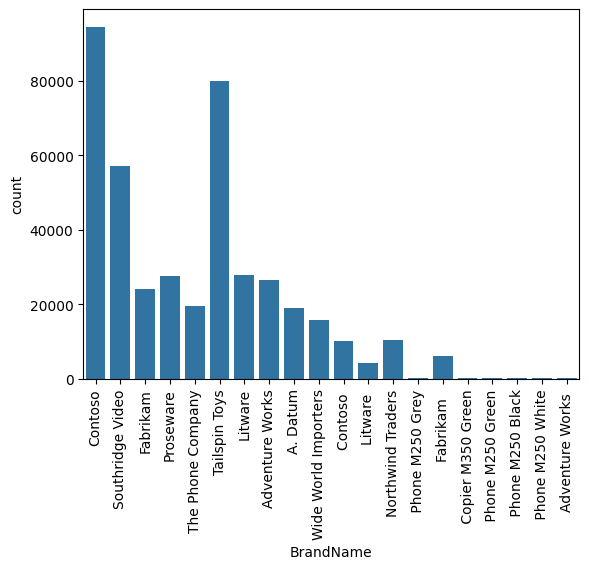

In [ ]:
# Brand distribution
plt.xticks(rotation=90)
sns.countplot(x='BrandName',data = df)

<Axes: xlabel='ClassName', ylabel='count'>

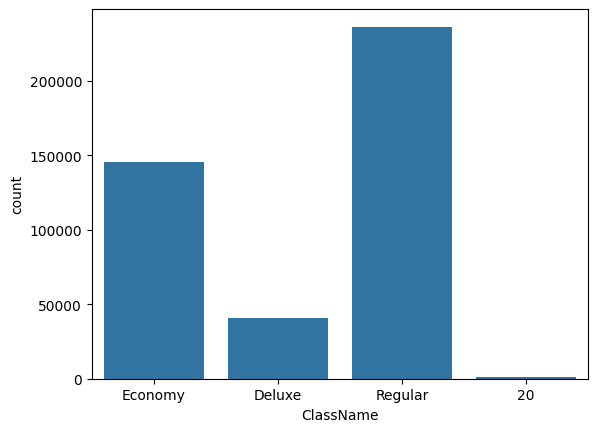

In [ ]:
# class distribution
sns.countplot(x='ClassName',data =df)

In [ ]:
# sales bu brands
brand_sales = df.groupby('ClassName')['SalesAmount'].sum().reset_index()
# brandsales in millions
brand_sales['SalesAmount'] = brand_sales['SalesAmount']/1_000_000
brand_sales

,ClassName,SalesAmount
0,20,0.142999
1,Deluxe,13.539021
2,Economy,15.178290
3,Regular,75.988229


<Axes: xlabel='ProductSubcategoryName', ylabel='count'>

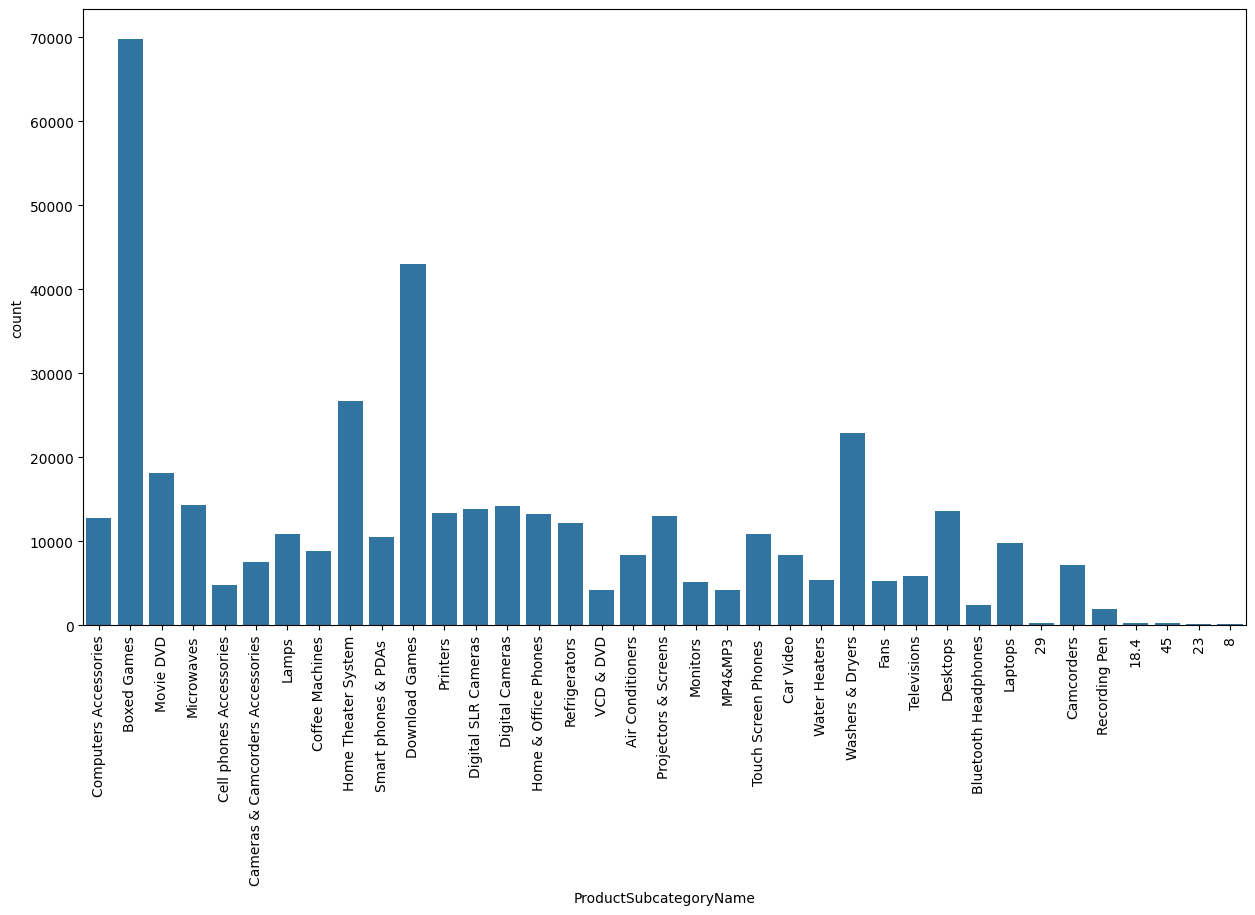

In [ ]:
# product categories
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.countplot(x='ProductSubcategoryName', data= df)

/tmp/ipython-input-1155690623.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


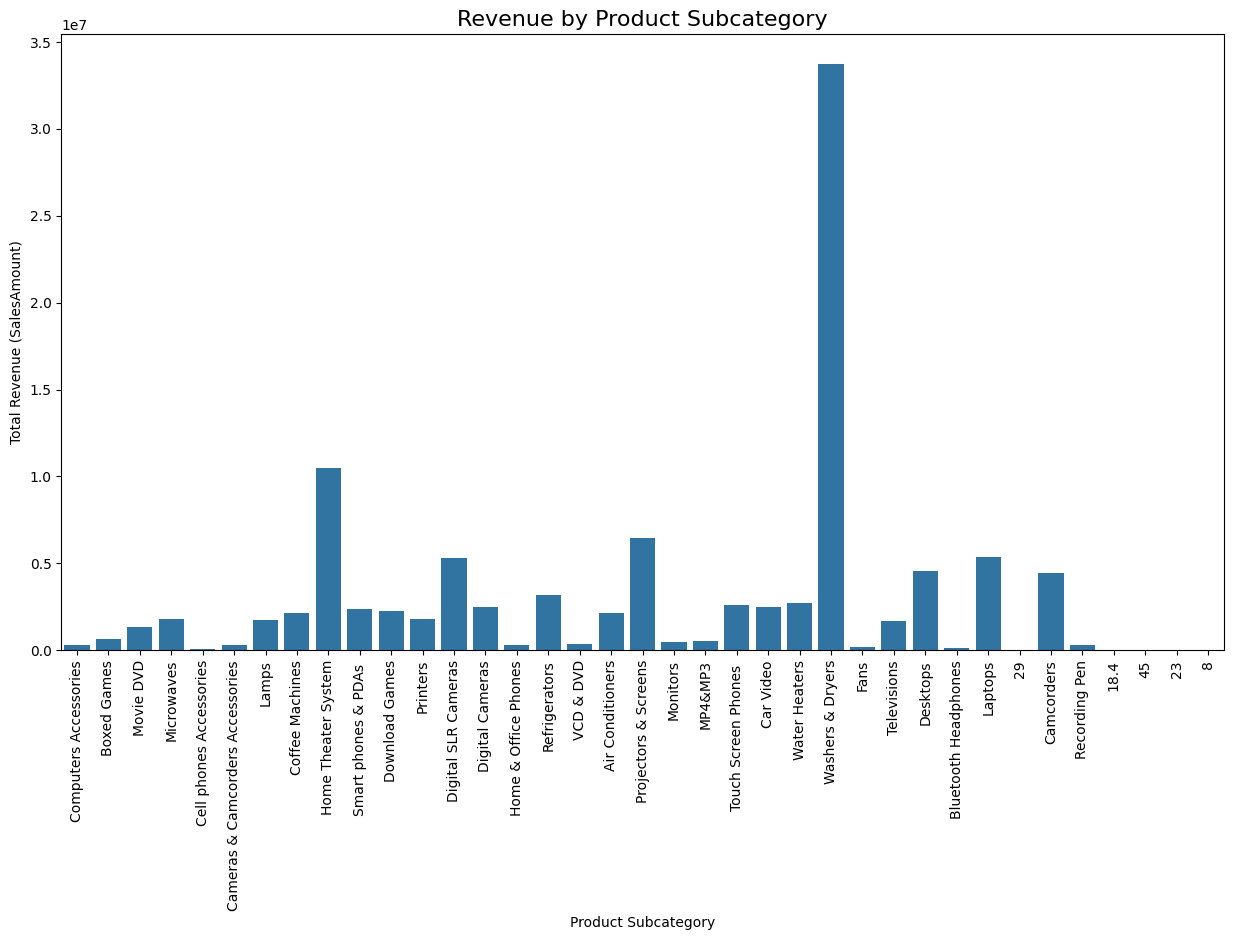

In [ ]:
# Product categories based on revenue
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

sns.barplot(
    x='ProductSubcategoryName',
    y='SalesAmount',
    data=df,
    estimator=sum,   # sum of revenue instead of count
    ci=None
)

plt.title("Revenue by Product Subcategory", fontsize=16)
plt.xlabel("Product Subcategory")
plt.ylabel("Total Revenue (SalesAmount)")
plt.show()

#### Seasonality

In [ ]:
df.Sale_month_year.unique()

array(['Jan-07', 'Nov-08', 'Dec-08', 'Feb-07', 'Mar-07', 'Apr-07'],
      dtype=object)

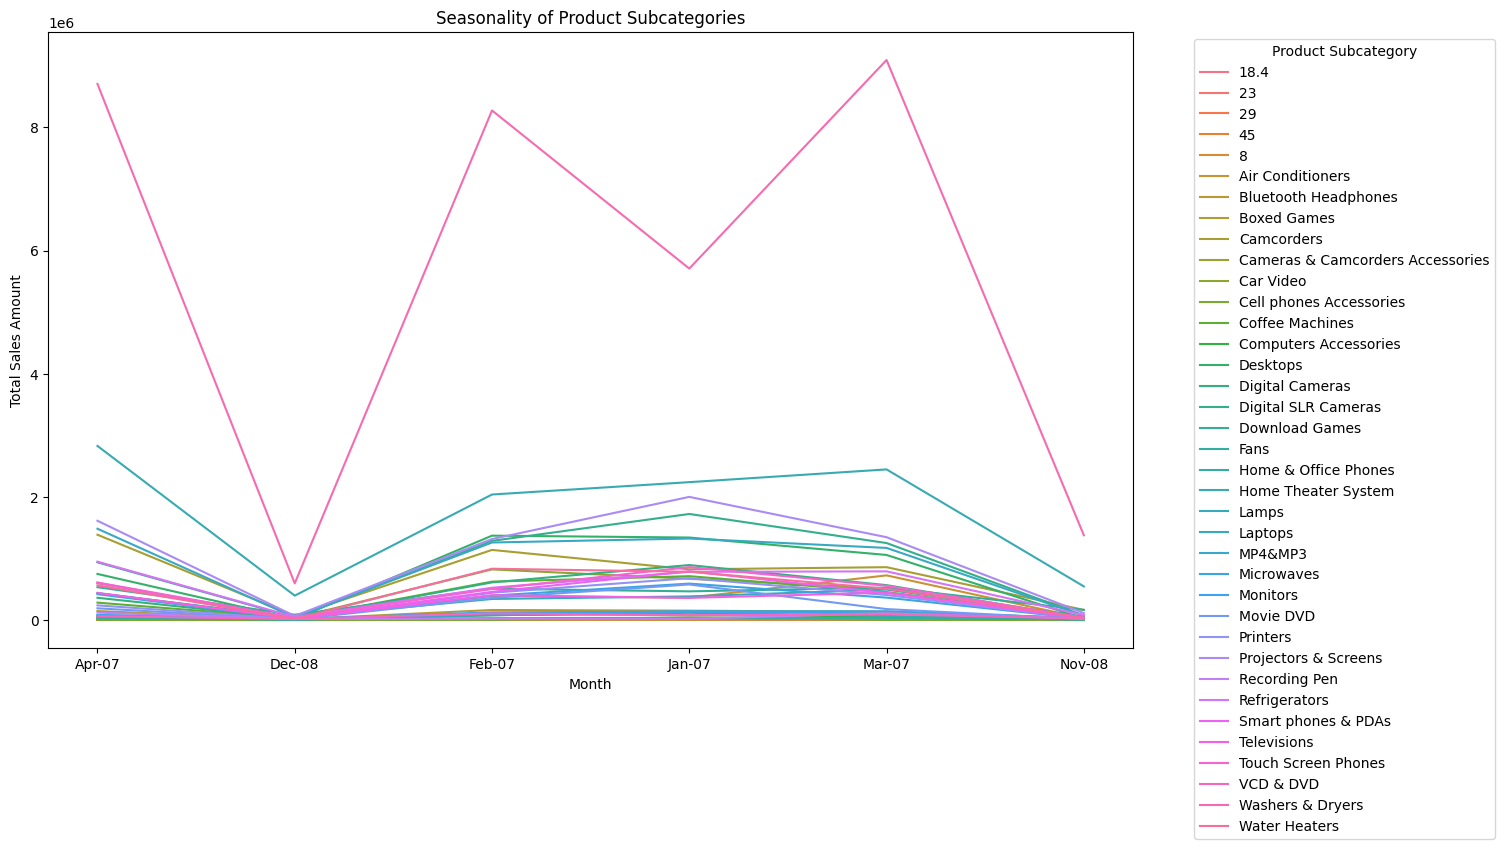

In [ ]:

# Aggregate sales by Month + ProductSubcategoryName
monthly_sales = df.groupby(["Sale_month_year", "ProductSubcategoryName"])["SalesAmount"].sum().reset_index()

plt.figure(figsize=(14,8))
sns.lineplot(data=monthly_sales, x="Sale_month_year", y="SalesAmount", hue="ProductSubcategoryName")

plt.title("Seasonality of Product Subcategories")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product Subcategory", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Nope ! Nope! uncomprehensable, seasonality will be answered by the previous notebook.

#### Profit

Gross profit will be the amount of money remaining after the subtraction of total cost, returned amounts and discounts.

In [ ]:
# Gross profit
df['Gross_Profit'] = ((df['SalesAmount'] - df['TotalCost'])- df['DiscountAmount']) - df['ReturnAmount']
# preview data
df.head(5)

,CustomerKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,ProductKey,Sale_month_year,SalesQuantity,SalesAmount,...,UnitCost,UnitPrice,ProductName,ProductSubcategoryKey,BrandName,ClassName,ColorName,StockTypeName,ProductSubcategoryName,Gross_Profit
0,333,City,Europe,Berlin,Berlin,Germany,782,Jan-07,1,10.36,...,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories,1.17
1,334,City,Europe,Newcastle upon Tyne,England,United Kingdom,782,Jan-07,1,10.36,...,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories,1.17
2,335,City,Europe,Stoke-on-Trent,England,United Kingdom,782,Jan-07,1,10.36,...,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories,1.17
3,336,City,Europe,Hof,Bavaria,Germany,782,Jan-07,1,10.36,...,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories,1.17
4,337,City,Europe,Paris,Seine (Paris),France,782,Jan-07,1,10.36,...,6.6,12.95,Contoso Mouse Lock Bundle E200 White,22,Contoso,Economy,White,High,Computers Accessories,1.17


In [ ]:
# Profit across continents
continental_prof = df.groupby('ContinentName')['Gross_Profit'].sum().reset_index()
#profit in millions
continental_prof['profit_in_millions'] = continental_prof['Gross_Profit']/1_000_000
# add million (M) notation
continental_prof['profit_in_millions'] = continental_prof['profit_in_millions'].apply(lambda x:f'{x:,.2f}M')
# display results
continental_prof

,ContinentName,Gross_Profit,profit_in_millions
0,Asia,7.401052e+03,0.01M
1,Australia,1.586981e+06,1.59M
2,Europe,1.176389e+07,11.76M
3,North America,2.457946e+07,24.58M


In [ ]:
# products with the most profit
# prod_profit = df.groupby(['ProductName','ContinentName'])['Gross_Profit'].sum().reset_index()
prod_profit = df.groupby(['ProductName'])['Gross_Profit'].sum().reset_index()
# top 10 products
top_10_profit_prod = prod_profit.sort_values(by='Gross_Profit', ascending=False).head(10)
# profit in millions
top_10_profit_prod['Gross_Profit_in_millions'] = top_10_profit_prod['Gross_Profit']/1_000_000
# adding (M) annotation
top_10_profit_prod['Gross_Profit_in_millions'] = top_10_profit_prod['Gross_Profit_in_millions'].apply(lambda x: f'{x:,.2f}M')
# display resullts
top_10_profit_prod

,ProductName,Gross_Profit,Gross_Profit_in_millions
1549,NT Washer & Dryer 27in L2700 White,901881.482,0.90M
1548,NT Washer & Dryer 27in L2700 Silver,828160.938,0.83M
1547,NT Washer & Dryer 27in L2700 Green,823838.162,0.82M
1546,NT Washer & Dryer 27in L2700 Blue,704062.160,0.70M
855,Contoso Washer & Dryer 24in M240 Green,362068.190,0.36M
1390,Litware Washer & Dryer 21in E214 Green,361729.320,0.36M
1734,Proseware Projector 1080p LCD86 Black,339758.220,0.34M
859,Contoso Washer & Dryer 24in M240 White,339295.830,0.34M
1536,NT Washer & Dryer 21in E2100 Silver,296392.172,0.30M
1389,Litware Washer & Dryer 21in E214 Blue,292271.580,0.29M


In [ ]:
# profit across product categories
cat_profit = df.groupby(['ProductSubcategoryName'])['Gross_Profit'].sum().reset_index()
# top 10 products
top_10_cat_prof = cat_profit.sort_values(by='Gross_Profit', ascending=False).head(10)
# profit in millions
top_10_cat_prof['Gross_Profit_in_millions'] = top_10_cat_prof['Gross_Profit']/1_000_000
# adding (M) annotation
top_10_cat_prof['Gross_Profit_in_millions'] = top_10_cat_prof['Gross_Profit_in_millions'].apply(lambda x: f'{x:,.2f}M')
# display resullts
top_10_cat_prof

,ProductSubcategoryName,Gross_Profit,Gross_Profit_in_millions
35,Washers & Dryers,1.171779e+07,11.72M
20,Home Theater System,3.632361e+06,3.63M
28,Projectors & Screens,2.345638e+06,2.35M
16,Digital SLR Cameras,2.335196e+06,2.34M
22,Laptops,2.073729e+06,2.07M
8,Camcorders,1.985398e+06,1.99M
14,Desktops,1.643612e+06,1.64M
30,Refrigerators,1.094550e+06,1.09M
36,Water Heaters,9.828166e+05,0.98M
33,Touch Screen Phones,9.712262e+05,0.97M


#### Product Sales Cities Conclusion


Wow! that was alot...

To recap, the purpose of this section was to analyze product sales across the continents down to its very cities. In the of city analysis, we discovered that australian cities had mixed with asian cities resuliting in inacurrate insight. After cleaning, the respective visualizations and product sales data was uncovered. Here are some of the insights:

* Top products providing the most revenue are washers and dryerss of various colors followed by a projector and camera. The variance in price is as a result of asthetic(color) or size...
* North America is the continent with the most sales and most revenue.
* Top three cities that produced the most revenue are all found in europe, namely London, paris, and berlin.
* Asia had the least amount of sales and subsequently the least amount of revenue.

?? WHy is the same item valued at different prices just because of color???
I belive different colors required different levels of items(couldnt think of a name) to reproduce sai color, hence as to why the same item  can have varying prices, also if a certain dempgraphic loves a certain color, it makes sense to slightly price items of that color.

?? Why is asia continent the country with the least sales??? Given most of the sales lie around electronics, its safe to assume that asian countries, given their advanced technological industry, are the ones producing and exporting it to various overseas companies and said companies distribute the eletronics to retail stores where the locals purchase it.

# Data Ecport- Ready for Dashboarding

In [ ]:
# download df
df_excel = df.to_excel

In [ ]:
file_path = 'C://Users//user//Desktop//Product_Sales_Data.xlsx'  # Specify the file name and path (e.g., 'C:/path/to/your/folder/Ecommerce_data.xlsx')
df.to_excel(file_path, index=False)